# Лабораторна робота 3

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
0 2 0 1 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0
1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 1 0 0 1 0 2 0 0 0 1 1 1 1
0 0 0 1 2 0 0 0 0 0 0 0 0 0 1 0 2 1 0 1 
0"""
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0])

абсолютні частоти

In [2]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2]
[57, 19, 5]


Варіаційний ряд відносних частот

In [3]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2]
[57, 19, 5]
[0.704, 0.235, 0.062]


Накопичені частоти

In [4]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.704,  0.939,  1.001])

Складемо другу статистичну таблицю

In [5]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': l_values,
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,57,0,0.704,0.704
1,19,1,0.235,0.939
2,5,2,0.062,1.001


$x_i * n_i$

In [6]:
xi_ni = np.array(l_keys) * np.array(l_values)
xi_ni

array([ 0, 19, 10])

$\lambda$

In [7]:
print(xi_ni.sum())
print(sum(l_values))
lambdaa = xi_ni.sum() / sum(l_values)
lambdaa

29
81


0.35802469135802467

$\lambda_i$

In [8]:
lambda_i = np.power(lambdaa, np.array(l_keys))
lambda_i

array([ 1.        ,  0.35802469,  0.12818168])

i!

In [9]:
from scipy.special import factorial
factorials = factorial(np.array(l_keys), exact=True)
factorials

array([1, 1, 2])

$e^h$

In [10]:
np.exp(1)
e_h = np.power(np.full((len(l_keys)), np.exp(1)), lambdaa * -1)
e_h

array([ 0.69905581,  0.69905581,  0.69905581])

$P_i$

In [11]:
Pi = lambda_i * e_h / factorials
Pi

array([ 0.69905581,  0.25027924,  0.04480307])

Ni`=Ni*Pi

In [12]:
Ni = np.full((len(l_keys)), np.array(sum(l_values))) * Pi
Ni

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(3, array(81)) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


array([ 56.62352095,  20.27261861,   3.62904901])

Ni-Ni`

In [13]:
abs_Ni = np.array(l_values) - Ni
abs_Ni

array([ 0.37647905, -1.27261861,  1.37095099])

Ni-Ni`*Ni-Ni`

In [14]:
abs_Ni_2 = abs_Ni * abs_Ni
abs_Ni_2

array([ 0.14173648,  1.61955813,  1.87950662])

Ni-Ni`*Ni-Ni`/n`i

In [15]:
abs_Ni_2_Ni = abs_Ni_2 / Ni
abs_Ni_2_Ni

array([ 0.00250314,  0.07988895,  0.5179061 ])

In [16]:
abs_Ni_2_Ni.sum()

0.60029818239817823

In [17]:
import math
(abs_Ni_2_Ni.sum() - 2) / math.sqrt(2 * 2)

-0.69985090880091083

Вторинна таблиця розподілу: 

In [18]:
x = pd.DataFrame({'Варіанта': range(len(l_keys)), '$x_i * n_i$': xi_ni, '$\lambda^i$': lambda_i, 
                  'i!': factorials, '$e^h$': e_h, '$P_i$': Pi, "$N_i*P_i$": Ni,
                  "Ni-Ni`": abs_Ni, "Ni-Ni`*Ni-Ni`": abs_Ni_2, "Ni-Ni`*Ni-Ni`/n`i": abs_Ni_2_Ni})
x

,$N_i*P_i$,$P_i$,$\lambda^i$,$e^h$,$x_i * n_i$,Ni-Ni`,Ni-Ni`*Ni-Ni`,Ni-Ni`*Ni-Ni`/n`i,i!,Варіанта
0,56.623521,0.699056,1.000000,0.699056,0,0.376479,0.141736,0.002503,1,0
1,20.272619,0.250279,0.358025,0.699056,19,-1.272619,1.619558,0.079889,1,1
2,3.629049,0.044803,0.128182,0.699056,10,1.370951,1.879507,0.517906,2,2


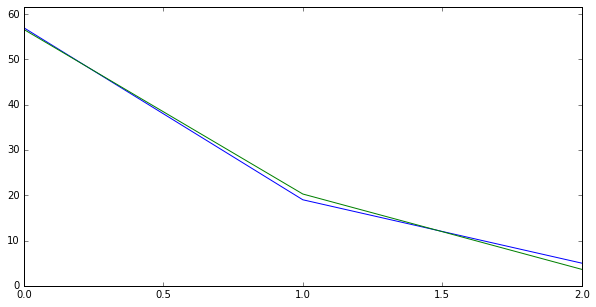

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
plt.xlim(0, len(l_keys) - 1)
plt.ylim(0, max(Ni) + 5)
plt.plot(l_keys, l_values)
plt.plot(l_keys, Ni)
plt.show()